In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from sklearn.preprocessing import MinMaxScaler


In [2]:
data = pd.read_csv('Covid-19_FR.csv', usecols=[1,5,6])
data['dateRep'] = pd.to_datetime(data['dateRep'])
data.head()

,dateRep,cases,totel
0,2019-12-31,0,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,0,0
4,2020-01-04,0,0


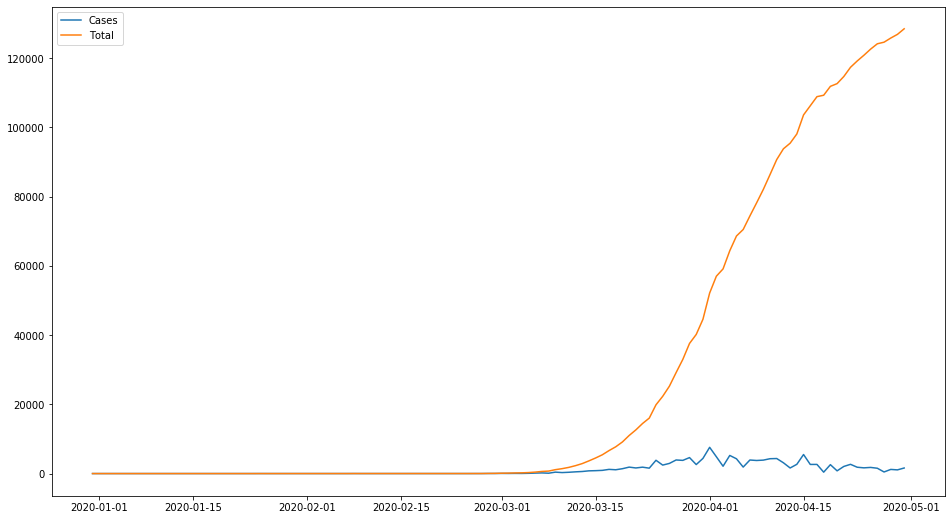

In [3]:
plt.figure(figsize=(16,9))
x = data['dateRep']
y = data['cases']
z = data['totel']
plt.plot(x,y)
plt.plot(x,z)
plt.legend(['Cases', 'Total'])
plt.show()

In [4]:
def create_dataset(dataset, look_back=9):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back),0]
		dataX.append(a)
		dataY.append(dataset[i + look_back,0])
	return np.array(dataX), np.array(dataY)


In [5]:
from sklearn.preprocessing import MinMaxScaler
dataset = data['cases'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(122, 1)

In [6]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [7]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX)

[[0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [3.9588282e-04]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.3196094e-04]
 [1.3196094e-04]
 [1.3196094e-04]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [6.5980473e-04]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [1.3196094e-04]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [0.0000000e+00]
 [2.6392189e-04]
 [3.9588282e-0

In [8]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
model = Sequential()
model.add(LSTM(256, input_shape=(1, look_back), activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=20, batch_size=2, verbose=2)

Epoch 1/20
42/42 - 0s - loss: 0.0033
Epoch 2/20
42/42 - 0s - loss: 0.0030
Epoch 3/20
42/42 - 0s - loss: 0.0026
Epoch 4/20
42/42 - 0s - loss: 0.0023
Epoch 5/20
42/42 - 0s - loss: 0.0021
Epoch 6/20
42/42 - 0s - loss: 0.0016
Epoch 7/20
42/42 - 0s - loss: 0.0012
Epoch 8/20
42/42 - 0s - loss: 8.1301e-04
Epoch 9/20
42/42 - 0s - loss: 5.2349e-04
Epoch 10/20
42/42 - 0s - loss: 3.4193e-04
Epoch 11/20
42/42 - 0s - loss: 2.5696e-04
Epoch 12/20
42/42 - 0s - loss: 1.9542e-04
Epoch 13/20
42/42 - 0s - loss: 1.8052e-04
Epoch 14/20
42/42 - 0s - loss: 1.8043e-04
Epoch 15/20
42/42 - 0s - loss: 2.0377e-04
Epoch 16/20
42/42 - 0s - loss: 2.1635e-04
Epoch 17/20
42/42 - 0s - loss: 2.0512e-04
Epoch 18/20
42/42 - 0s - loss: 2.2587e-04
Epoch 19/20
42/42 - 0s - loss: 2.0083e-04
Epoch 20/20
42/42 - 0s - loss: 1.7813e-04


In [10]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict = trainPredict.reshape(-1,1)
testPredict = testPredict.reshape(-1,1)
#trainPredict = scaler.inverse_transform(trainPredict)
#testPredict = scaler.inverse_transform(testPredict)
#dataset = scaler.inverse_transform(dataset)

In [11]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
dataset = scaler.inverse_transform(dataset)

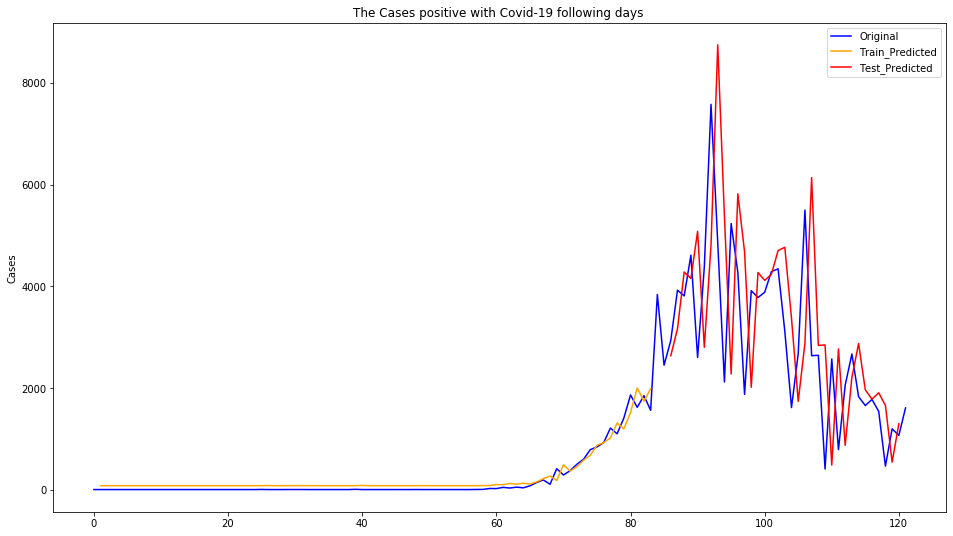

In [12]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(16,9))
plt.plot(dataset, color = 'blue')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'red')
plt.legend(['Original','Train_Predicted','Test_Predicted'])
plt.title('The Cases positive with Covid-19 following days ')
plt.ylabel('Cases')
plt.show()

In [13]:
testY =scaler.inverse_transform(testY.reshape(-1,1))

In [14]:
testY

array([[2931.    ],
       [3922.    ],
       [3809.    ],
       [4611.    ],
       [2599.    ],
       [4376.    ],
       [7578.    ],
       [4861.    ],
       [2116.    ],
       [5233.    ],
       [4267.    ],
       [1873.    ],
       [3912.0002],
       [3777.    ],
       [3880.9998],
       [4286.    ],
       [4342.    ],
       [3114.    ],
       [1613.    ],
       [2673.    ],
       [5497.    ],
       [2633.    ],
       [2641.    ],
       [ 405.    ],
       [2569.    ],
       [ 785.    ],
       [2051.    ],
       [2667.    ],
       [1827.    ],
       [1653.    ],
       [1773.    ],
       [1537.    ],
       [ 461.    ],
       [1195.    ],
       [1065.    ]], dtype=float32)

In [15]:
testPredict

array([[2631.0923 ],
       [3164.3188 ],
       [4280.545  ],
       [4151.325  ],
       [5079.639  ],
       [2798.508  ],
       [4804.9175 ],
       [8748.519  ],
       [5374.483  ],
       [2272.93   ],
       [5818.0464 ],
       [4678.254  ],
       [2011.5442 ],
       [4269.0884 ],
       [4114.831  ],
       [4233.5977 ],
       [4700.2983 ],
       [4765.362  ],
       [3367.5073 ],
       [1734.254  ],
       [2879.7979 ],
       [6136.3286 ],
       [2835.8354 ],
       [2844.6257 ],
       [ 482.59183],
       [2765.612  ],
       [ 869.84674],
       [2202.8071 ],
       [2873.2043 ],
       [1962.2803 ],
       [1776.7311 ],
       [1904.5614 ],
       [1653.7301 ],
       [ 539.28894],
       [1294.3345 ]], dtype=float32)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(testY, testPredict)
MSE = mean_squared_error(testY, testPredict)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

1398.1714
3175812.8
1782.081


In [17]:
from sklearn.preprocessing import MinMaxScaler
dataset = data['cases'].values
dataset = dataset.astype('float32')
dataset = dataset.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(122, 1)

In [18]:
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [19]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [20]:
ANN_model = Sequential()
ANN_model.add(Dense(512, input_shape=(1, look_back), activation='relu'))
ANN_model.add(Dense(1))
ANN_model.compile(loss='mean_squared_error', optimizer='adam')
ANN_model.fit(trainX, trainY, epochs=20, batch_size=2, verbose=2)

Epoch 1/20
42/42 - 0s - loss: 0.0022
Epoch 2/20
42/42 - 0s - loss: 6.3064e-04
Epoch 3/20
42/42 - 0s - loss: 2.2196e-04
Epoch 4/20
42/42 - 0s - loss: 2.8058e-04
Epoch 5/20
42/42 - 0s - loss: 2.4771e-04
Epoch 6/20
42/42 - 0s - loss: 2.1587e-04
Epoch 7/20
42/42 - 0s - loss: 2.2269e-04
Epoch 8/20
42/42 - 0s - loss: 1.9739e-04
Epoch 9/20
42/42 - 0s - loss: 2.4523e-04
Epoch 10/20
42/42 - 0s - loss: 2.1444e-04
Epoch 11/20
42/42 - 0s - loss: 2.7687e-04
Epoch 12/20
42/42 - 0s - loss: 2.2898e-04
Epoch 13/20
42/42 - 0s - loss: 2.0219e-04
Epoch 14/20
42/42 - 0s - loss: 1.8684e-04
Epoch 15/20
42/42 - 0s - loss: 1.8539e-04
Epoch 16/20
42/42 - 0s - loss: 1.8530e-04
Epoch 17/20
42/42 - 0s - loss: 2.0291e-04
Epoch 18/20
42/42 - 0s - loss: 2.5840e-04
Epoch 19/20
42/42 - 0s - loss: 1.8138e-04
Epoch 20/20
42/42 - 0s - loss: 2.1070e-04


In [21]:
trainPredict = ANN_model.predict(trainX)
testPredict = ANN_model.predict(testX)
trainPredict = trainPredict.reshape(-1,1)
testPredict = testPredict.reshape(-1,1)

In [22]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
dataset = scaler.inverse_transform(dataset)

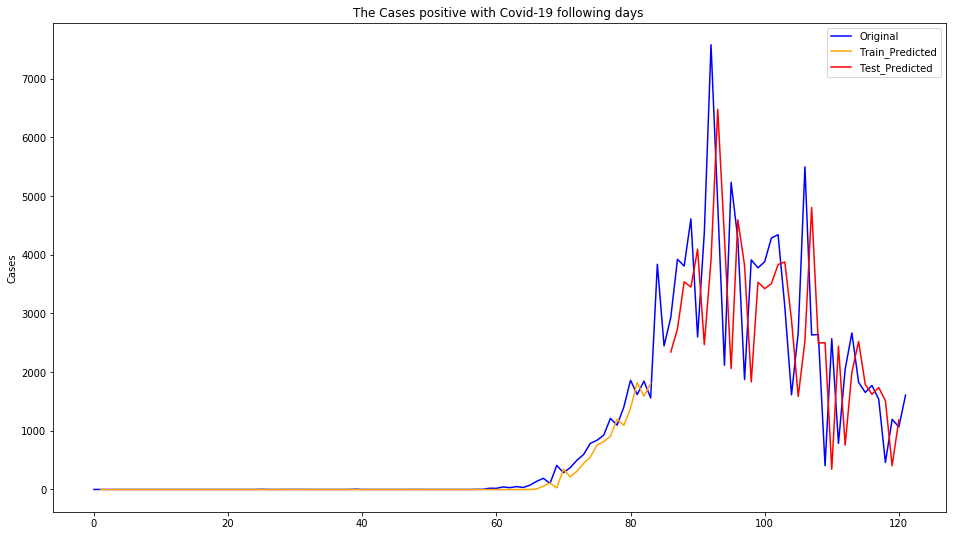

In [23]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(16,9))
plt.plot(dataset, color = 'blue')
plt.plot(trainPredictPlot, color = 'orange')
plt.plot(testPredictPlot, color = 'red')
plt.legend(['Original','Train_Predicted','Test_Predicted'])
plt.title('The Total positive with Covid-19 following days ')
plt.ylabel('Cases')
plt.show()

In [24]:
testY =scaler.inverse_transform(testY.reshape(-1,1))

In [25]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
MAE = mean_absolute_error(testY, testPredict)
MSE = mean_squared_error(testY, testPredict)
RMSE = np.sqrt(MSE)
print(MAE)
print(MSE)
print(RMSE)

1231.2732
2365760.5
1538.1029
